In [1]:
from tqdm.notebook import tqdm
from data_wrangling.datamanager import DataLoader
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt

### Multichannel.

In [2]:
# # Load data
# dl = DataLoader()
# data = dl.get_fcx2(['s1'])

# # Basic preprocessing
# X1 = data['s1']['data']
# mn = X1.mean(0).reshape((1, -1))
# st = X1.std (0).reshape((1, -1))
# X1 = (X1 - mn) / st

# # Data organization
# fs = 1000
# idxs_train_test_split = int(len(X1) * 0.7)
# p_in  = 100
# p_out = 10
# step  = 15

# idxs_train = np.arange(0, idxs_train_test_split - p_out - p_in, step)

# X = np.stack([
#     X1[idx : idx + p_in]
#     for idx in idxs_train
# ])

# Y = np.stack([
#     X1[idx + p_in : idx + p_in + p_out]
#     for idx in idxs_train
# ])

# np.save('idxs_train_test_split', idxs_train_test_split)
# np.save('X1', X1)
# np.save('X', X)
# np.save('Y', Y)
    
# del data
# del X1
# del X
# del Y
# del idxs_train
# del mn
# del st

### Spectrogram.

In [3]:
# # Load data
# dl = DataLoader()
# data = dl.get_fcx2(['s1'])

# # Basic preprocessing
# f, fi, t, X1 = data['s1']['spectrogram'](0, noverlap = 99, nfft = 2 ** 8)

# # Data organization
# fs = 1000
# idxs_train_test_split = int(len(X1) * 0.7)
# p_in  = 100
# p_out = 10
# step  = 15

# idxs_train = np.arange(0, idxs_train_test_split - p_out - p_in, step)

# X = np.stack([
#     X1[idx : idx + p_in]
#     for idx in idxs_train
# ])

# Y = np.stack([
#     X1[idx + p_in : idx + p_in + p_out]
#     for idx in idxs_train
# ])

# np.save('idxs_train_test_split', idxs_train_test_split)
# np.save('X1', X1)
# np.save('X', X)
# np.save('Y', Y)
    
# print(X1.shape, X.shape, Y.shape)
    
# del data
# del X1
# del X
# del Y
# del idxs_train

In [2]:
params_1 = []
for depth_pre in [1, 2]:
    for width in [64, 128]:
        for depth_post in [1, 2]:
            for dropout in [0, 0.3]:
                params_1.append((
                    depth_pre,
                    width,
                    width * 2,
                    depth_post,
                    width,
                    dropout
                ))
len(params_1)

16

In [3]:
params_2 = []
for depth_pre in [1, 2, 3]:
    for width in [64, 128]:
        for depth_post in [0, 1]:
            for dropout in [0, 0.3]:
                params_2.append((
                    depth_pre,
                    width,
                    depth_post,
                    width,
                    dropout
                ))
len(params_2)

24

In [4]:
params_3 = []
for depth_pre in [1, 2]:
    for width in [64, 128]:
        for depth_post in [1, 2]:
            for dropout in [0, 0.3]:
                params_3.append((
                    depth_pre,
                    width,
                    depth_post,
                    width,
                    dropout
                ))
len(params_3)

16

In [7]:
# for idx, (
#     depth_pre,
#     width_pre,
#     width_mid,
#     depth_post,
#     width_post,
#     dropout
# ) in tqdm(enumerate(params_1)):
#     !python3 batch_test-1.py $depth_pre $width_pre $width_mid $depth_post $width_post $dropout $idx

In [8]:
# for idx, (
#     depth_pre,
#     width_pre,
#     depth_post,
#     width_post,
#     dropout
# ) in tqdm(enumerate(params_2)):
#     !python3 batch_test-2.py $depth_pre $width_pre $depth_post $width_post $dropout $idx

In [9]:
# for idx, (
#     depth_pre,
#     width_pre,
#     depth_post,
#     width_post,
#     dropout
# ) in tqdm(enumerate(params_3)):
#     !python3 batch_test-3.py $depth_pre $width_pre $depth_post $width_post $dropout $idx

In [10]:
# !rm X.npy
# !rm Y.npy
# !rm X1.npy
# !rm idxs_train_test_split.npy

In [5]:
dirs = [
    'results_batch_test_1',
    'results_batch_test_2',
    'results_batch_test_3',
    'results_batch_test_1-ms',
    'results_batch_test_2-ms',
    'results_batch_test_3-ms',
]

files = [
    sorted(
        os.listdir(d),
        key = lambda t: int(t.replace('.pickle', '').replace('res-', ''))
    )
    for d in dirs
]


def unpickle(f):
    with open(f, 'rb') as fp:
        obj = pickle.load(fp)
    return obj

ress = [
    [
        unpickle(f'{d}/{f}')
        for f in lst
    ]
    for d, lst in zip(dirs, files)
]

In [6]:
mses = [
    np.array([
        np.mean(r['mse']) 
        for r in res
    ])
    for res in ress
]

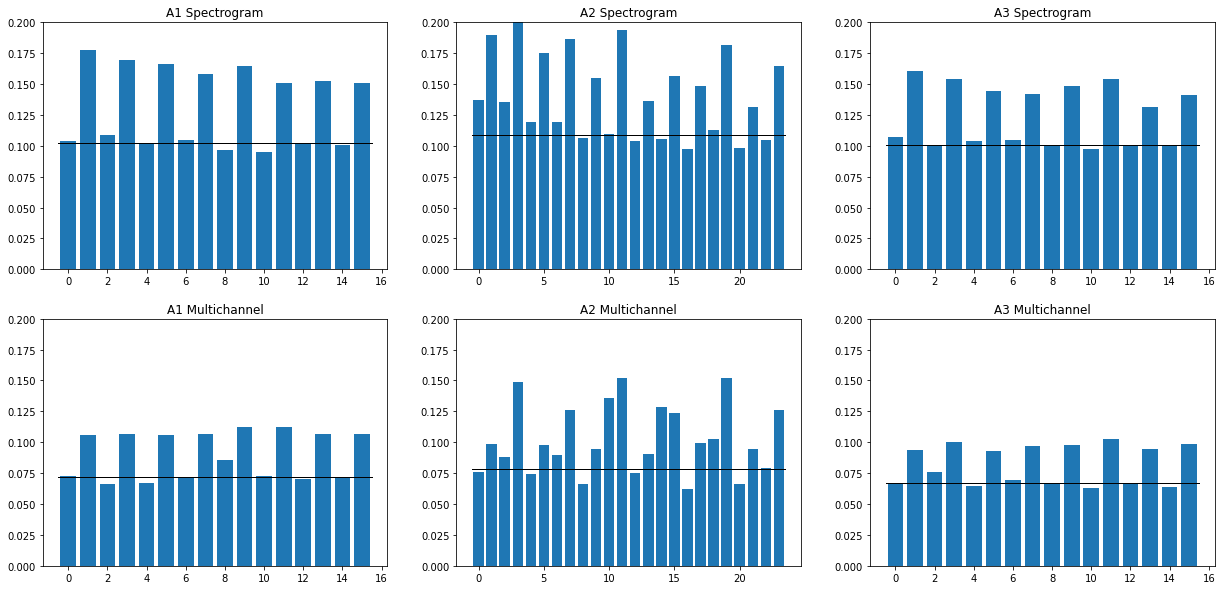

In [7]:
labels = [
    'A1 Spectrogram',
    'A2 Spectrogram',
    'A3 Spectrogram',
    'A1 Multichannel',
    'A2 Multichannel',
    'A3 Multichannel',
]

cols = 3
rows = 2
fig = plt.figure(figsize = (7 * cols, 5 * rows))
axes = [plt.subplot(rows, cols, idx + 1) for idx in range(6)]

for mse, ax, lab in zip(mses, axes, labels):
    ax.bar(np.arange(len(mse)), mse)
    ax.plot(
        [-0.5, len(mse) - 0.5], 
        [np.percentile(mse, 25), np.percentile(mse, 25)], 
        linewidth = 1, 
        c = 'black'
    )
    ax.set_ylim(0, 0.2)
    ax.set_title(lab)
plt.show()

In [8]:
best = [
    np.min(lst)
    for lst in mses
]
best

[0.09475187027781178,
 0.09767757985348648,
 0.09730340277182023,
 0.06603186629779002,
 0.06243457680745417,
 0.06257990887242335]

In [9]:
df1 = pd.DataFrame(params_1, columns = [
    'depth_pre',
    'width_pre',
    'width_mid',
    'depth_post',
    'width_post',
    'dropout'
])

df1['mses'] = mses[0]

df1.sort_values('mses')

,depth_pre,width_pre,width_mid,depth_post,width_post,dropout,mses
10,2,64,128,2,64,0.0,0.094752
8,2,64,128,1,64,0.0,0.096848
14,2,128,256,2,128,0.0,0.100563
4,1,128,256,1,128,0.0,0.101880
12,2,128,256,1,128,0.0,0.102564
0,1,64,128,1,64,0.0,0.103473
6,1,128,256,2,128,0.0,0.104851
2,1,64,128,2,64,0.0,0.108749
11,2,64,128,2,64,0.3,0.150890
15,2,128,256,2,128,0.3,0.151150


In [10]:
df2 = pd.DataFrame(params_2, columns = [
    'depth_pre',
    'width_pre',
    'depth_post',
    'width_post',
    'dropout'
])

df2['mses'] = mses[1]

df2.sort_values('mses')

,depth_pre,width_pre,depth_post,width_post,dropout,mses
16,3,64,0,64,0.0,0.097678
20,3,128,0,128,0.0,0.097921
12,2,128,0,128,0.0,0.103823
22,3,128,1,128,0.0,0.104833
14,2,128,1,128,0.0,0.105155
8,2,64,0,64,0.0,0.106262
10,2,64,1,64,0.0,0.109257
18,3,64,1,64,0.0,0.112773
6,1,128,1,128,0.0,0.119293
4,1,128,0,128,0.0,0.119431


In [11]:
df3 = pd.DataFrame(params_3, columns = [
    'depth_pre',
    'width_pre',
    'depth_post',
    'width_post',
    'dropout'
])

df3['mses'] = mses[2]

df3.sort_values('mses')

,depth_pre,width_pre,depth_post,width_post,dropout,mses
10,2,64,2,64,0.0,0.097303
8,2,64,1,64,0.0,0.099673
14,2,128,2,128,0.0,0.099814
12,2,128,1,128,0.0,0.100629
2,1,64,2,64,0.0,0.100920
4,1,128,1,128,0.0,0.103932
6,1,128,2,128,0.0,0.104806
0,1,64,1,64,0.0,0.106935
13,2,128,1,128,0.3,0.131370
15,2,128,2,128,0.3,0.141304


In [12]:
df4 = pd.DataFrame(params_1, columns = [
    'depth_pre',
    'width_pre',
    'width_mid',
    'depth_post',
    'width_post',
    'dropout'
])

df4['mses'] = mses[3]

df4.sort_values('mses')

,depth_pre,width_pre,width_mid,depth_post,width_post,dropout,mses
2,1,64,128,2,64,0.0,0.066032
4,1,128,256,1,128,0.0,0.066656
12,2,128,256,1,128,0.0,0.069911
6,1,128,256,2,128,0.0,0.070876
14,2,128,256,2,128,0.0,0.072097
0,1,64,128,1,64,0.0,0.072728
10,2,64,128,2,64,0.0,0.072958
8,2,64,128,1,64,0.0,0.085815
5,1,128,256,1,128,0.3,0.105938
1,1,64,128,1,64,0.3,0.106039


In [13]:
df5 = pd.DataFrame(params_2, columns = [
    'depth_pre',
    'width_pre',
    'depth_post',
    'width_post',
    'dropout'
])

df5['mses'] = mses[4]

df5.sort_values('mses')

,depth_pre,width_pre,depth_post,width_post,dropout,mses
16,3,64,0,64,0.0,0.062435
20,3,128,0,128,0.0,0.066075
8,2,64,0,64,0.0,0.066309
4,1,128,0,128,0.0,0.074236
12,2,128,0,128,0.0,0.074979
0,1,64,0,64,0.0,0.075556
22,3,128,1,128,0.0,0.079013
2,1,64,1,64,0.0,0.087799
6,1,128,1,128,0.0,0.089628
13,2,128,0,128,0.3,0.090274


In [14]:
df6 = pd.DataFrame(params_3, columns = [
    'depth_pre',
    'width_pre',
    'depth_post',
    'width_post',
    'dropout'
])

df6['mses'] = mses[5]

df6.sort_values('mses')

,depth_pre,width_pre,depth_post,width_post,dropout,mses
10,2,64,2,64,0.0,0.062580
14,2,128,2,128,0.0,0.063741
4,1,128,1,128,0.0,0.064524
0,1,64,1,64,0.0,0.065941
12,2,128,1,128,0.0,0.066845
8,2,64,1,64,0.0,0.067138
6,1,128,2,128,0.0,0.069700
2,1,64,2,64,0.0,0.075702
5,1,128,1,128,0.3,0.092663
1,1,64,1,64,0.3,0.093524


In [15]:
ms_mc_params = []
for t_in in [100, 200]:
    for t_out in [10, 20, 50, 100]:
        for architecture in [1, 2, 3]:
            ms_mc_params.append((t_in, t_out, architecture))
            
for t_in, t_out, architecture in tqdm(ms_mc_params):
    !python3 batch-ms-mc.py $t_in $t_out $architecture

  0%|          | 0/24 [00:00<?, ?it/s]

2021-05-16 18:22:44.133410: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0



100 - 10 - 1



2021-05-16 18:23:16.088399: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-16 18:23:16.089044: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-16 18:23:16.119394: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-16 18:23:16.119708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.797GHz coreCount: 20 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 298.32GiB/s
2021-05-16 18:23:16.119740: I tensorflow/stream_executor

In [16]:
ress = []
files = !ls results_batch_ms_mc
files = [f'results_batch_ms_mc/{f}' for f in files]

for f in files:
    with open(f, 'rb') as fp:
        ress.append(pickle.load(fp))

In [21]:
test_params = [
    f.replace('results_batch_ms_mc/res-', '').replace('.pickle', '').split('-')
    for f in files
]

df = pd.DataFrame(np.concatenate([
    np.array(test_params).astype('int'),
    np.array([r['mse'] for r in ress]).reshape((-1, 1))
], 1), columns = [
    't_in',
    't_out',
    'architecture',
    'mse'
])

In [22]:
df[df['architecture'] == 1].sort_values('mse')

,t_in,t_out,architecture,mse
3,100.0,10.0,1.0,0.080456
6,100.0,20.0,1.0,0.137668
15,200.0,10.0,1.0,0.140254
18,200.0,20.0,1.0,0.154304
21,200.0,50.0,1.0,0.279993
9,100.0,50.0,1.0,0.292560
12,200.0,100.0,1.0,0.394506
0,100.0,100.0,1.0,0.409651


In [23]:
df[df['architecture'] == 2].sort_values('mse')

,t_in,t_out,architecture,mse
4,100.0,10.0,2.0,0.067122
16,200.0,10.0,2.0,0.068310
7,100.0,20.0,2.0,0.127256
19,200.0,20.0,2.0,0.152212
10,100.0,50.0,2.0,0.296960
22,200.0,50.0,2.0,0.303258
1,100.0,100.0,2.0,0.437430
13,200.0,100.0,2.0,0.441699


In [24]:
df[df['architecture'] == 3].sort_values('mse')

,t_in,t_out,architecture,mse
17,200.0,10.0,3.0,0.073809
5,100.0,10.0,3.0,0.080839
8,100.0,20.0,3.0,0.134992
20,200.0,20.0,3.0,0.142138
23,200.0,50.0,3.0,0.297204
11,100.0,50.0,3.0,0.303898
14,200.0,100.0,3.0,0.437626
2,100.0,100.0,3.0,0.448517


In [25]:
lossess = []
for res in ress:
    losses = []
    for lt in ['loss', 'val_loss']:
        losses.append(np.concatenate([
            res['hists'][0][lt],
            res['hists'][1][lt]
        ]))
    lossess.append(losses)

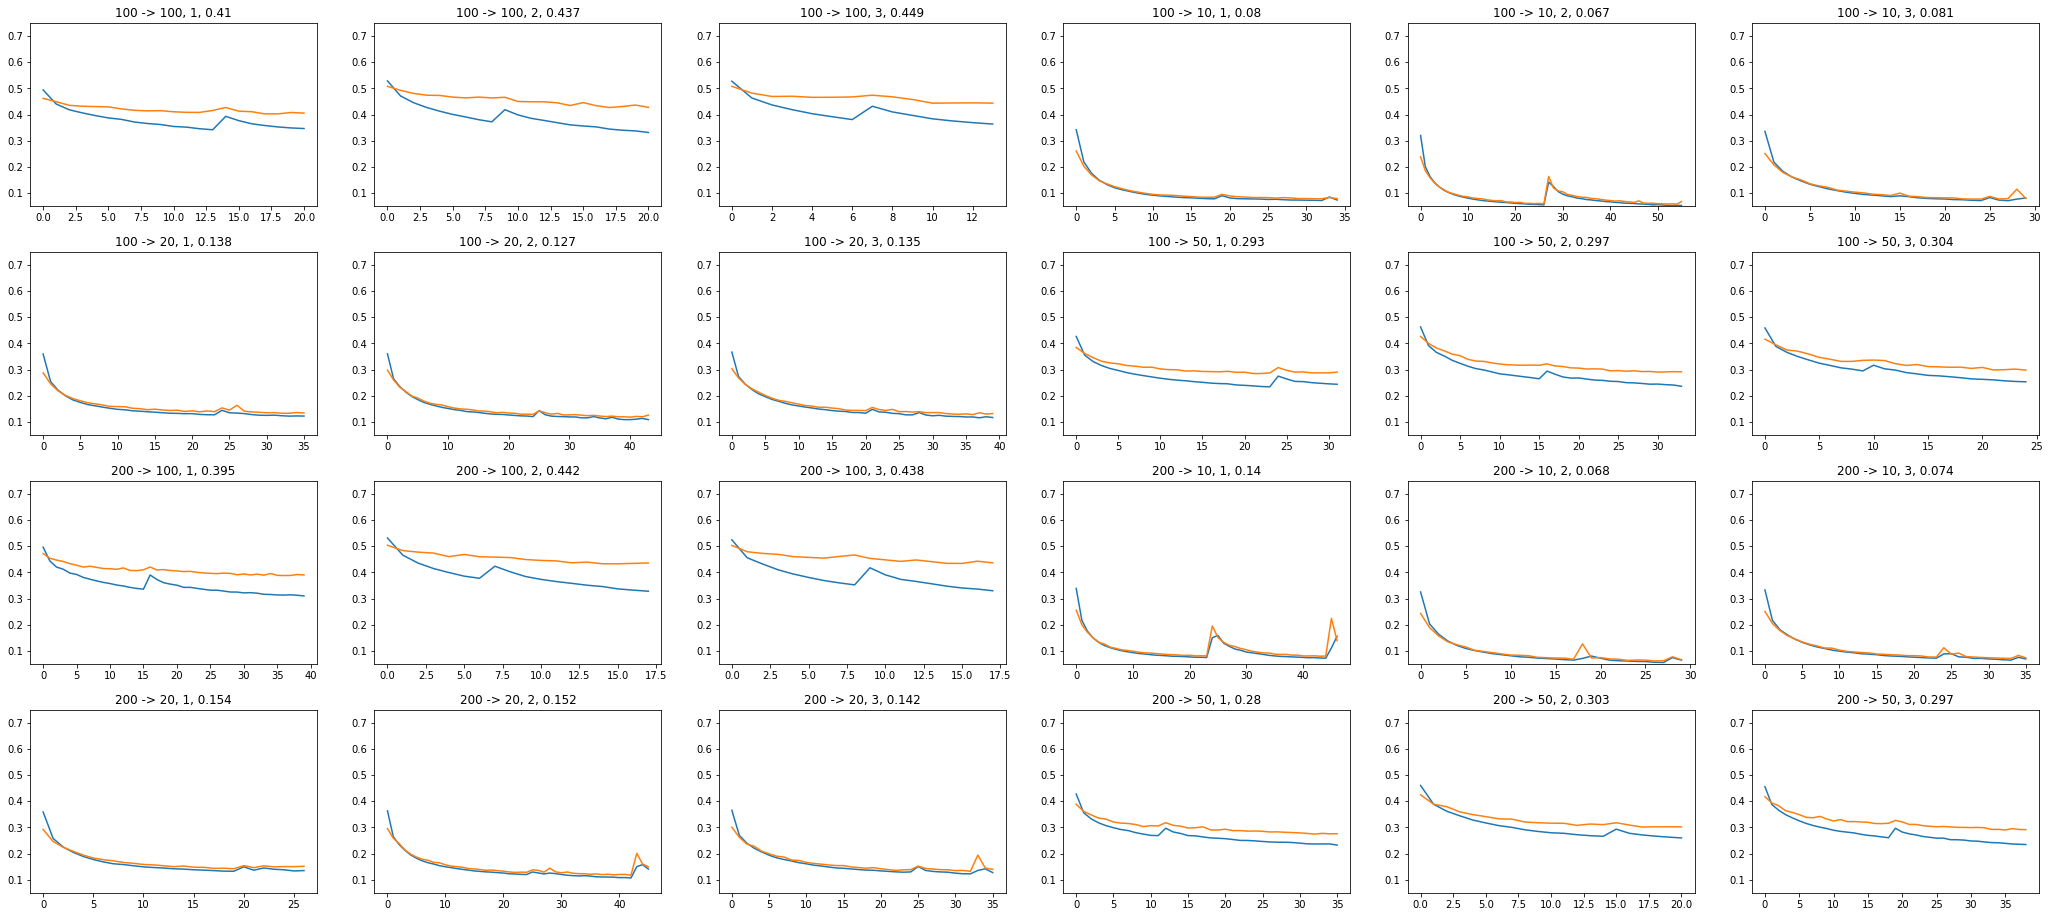

In [27]:
rows = 4
cols = 6
plt.figure(figsize = (6 * cols, 4 * rows))
plt.subplots_adjust(hspace = 0.25)
axes = [plt.subplot(rows, cols, idx + 1) for idx in range(len(lossess))]
for (
    ax, 
    losses, 
    (t_in, t_out, architecture, mse)
) in zip(
    axes, 
    lossess, 
    df.values
):
    ax.set_ylim(0.05, 0.75)
    ax.plot(losses[0])
    ax.plot(losses[1])
    ax.set_title(f'{int(t_in)} -> {int(t_out)}, {int(architecture)}, {round(mse, 3)}')
plt.show()